In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



### EDA

In [8]:
print(titanic_df.isnull().sum())
print(titanic_df.describe())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  


##### **5 Pandas Questions from ChatGPT**
1. What was the average age of passengers in each passenger class (Pclass)?
2. What percentage of passengers survived, and how does this percentage differ by gender
3. How many passengers were traveling alone versus with family members (SibSp and Parch)?
4. What si the survival rate for passengers traveling alone versus with family members?
5. What was the fare distribution among passengers, and how did fare vary across different classes?

In [10]:
# 1. What was the average age of passengers in each passenger class (Pclass)?

titanic_df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [42]:
# 2. What percentage of the passengers survived, and how does this percentage differ by gender?

dead = titanic_df['Survived'] == 0
alive = titanic_df['Survived'] == 1

# print(f"Percentage of passenger died: {round(titanic_df[dead]['PassengerId'].count() / titanic_df['PassengerId'].count(), 3)*100}%")
# print(f"Percentage of passenger alive: {round(titanic_df[alive]['PassengerId'].count() / titanic_df['PassengerId'].count(), 3)*100}%")

# Other way to answer this question: Use value_counts(normalize=True)
survival_percentages = titanic_df['Survived'].value_counts(normalize=True) * 100 #normalize=True returns relative frequency
print(survival_percentages)

# Get the percentage difference by gender

print(f"Females survived: {(titanic_df.groupby('Sex')['Survived'].value_counts(normalize=True)['female', 1] * 100):.2f}%") #.2f to help with the decimal points
print(f"Females died: {(titanic_df.groupby('Sex')['Survived'].value_counts(normalize=True)['female', 0] * 100):.2f}%")
print(f"Males survived: {(titanic_df.groupby('Sex')['Survived'].value_counts(normalize=True)['male', 1] * 100):.2f}%")
print(f"Males died: {(titanic_df.groupby('Sex')['Survived'].value_counts(normalize=True)['male', 0] * 100):.2f}%")

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64
Females survived: 74.20%
Females died: 25.80%
Males survived: 18.89%
Males died: 81.11%


##### **5 Matplotlib Questions from ChatGPT**

1. How can you visualize the distribution of passenger ages using a histogram?
2. How can you create a bar plot showing the number of passengers in each passenger class (Pclass)?
3. How can you create a pie chart to display the proportion of male and female passengers?
4. How can you plot a stacked bar chart to show the survival count based on both gender and passenger class?
5. How can you create a scatter plot to visualize the relationship between passenger age and fare?

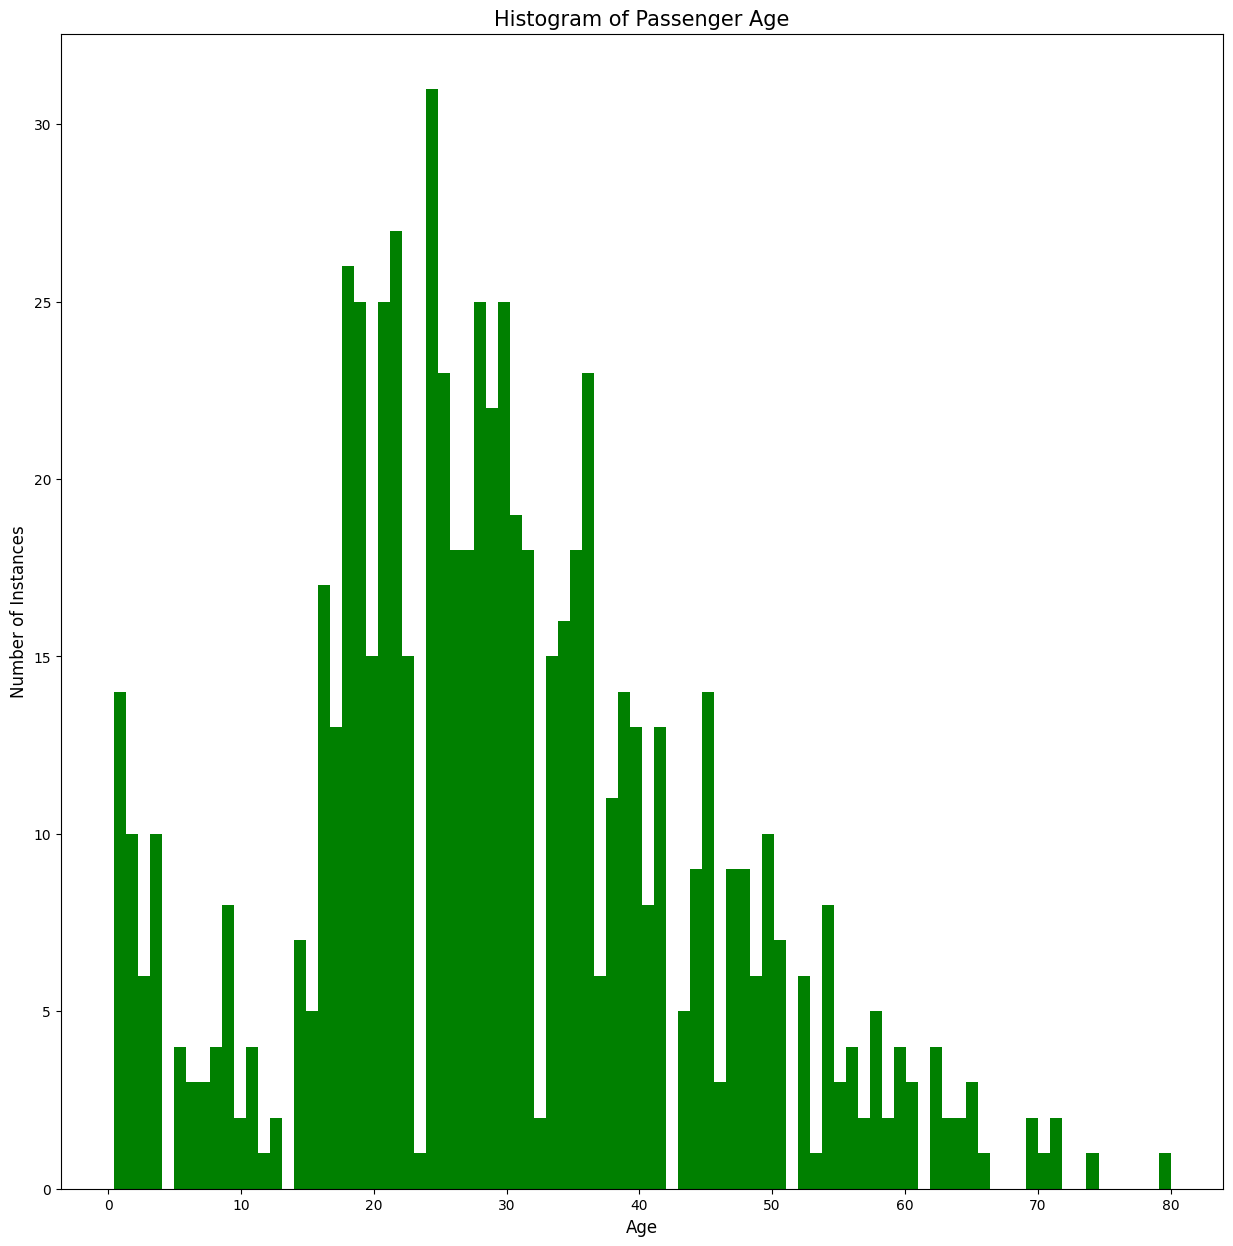

In [51]:
# 1. How can you visualize the distribution of passenger ages using a histogram
%matplotlib inline

plt.figure(figsize=(15, 15))
plt.hist(titanic_df['Age'], bins=titanic_df['Age'].nunique(), color='g')
plt.title('Histogram of Passenger Age', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)

plt.show()

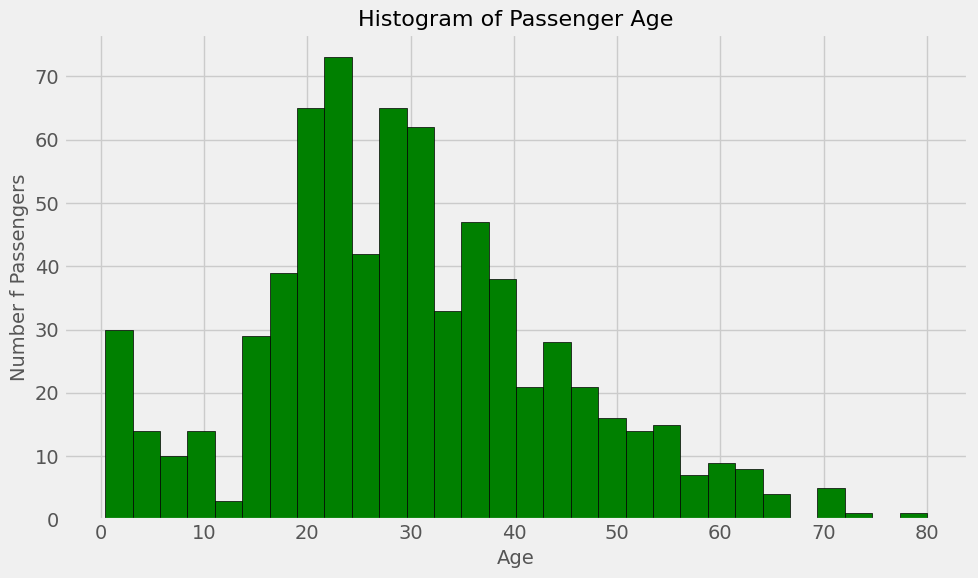

In [60]:
# 1. Improvements
plt.style.use('fivethirtyeight')

plt.figure(figsize=(10, 6))
plt.hist(titanic_df['Age'].dropna(), bins=30, color='g', edgecolor='black')
plt.title('Histogram of Passenger Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number f Passengers', fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()

AttributeError: 'Series' object has no attribute 'patches'

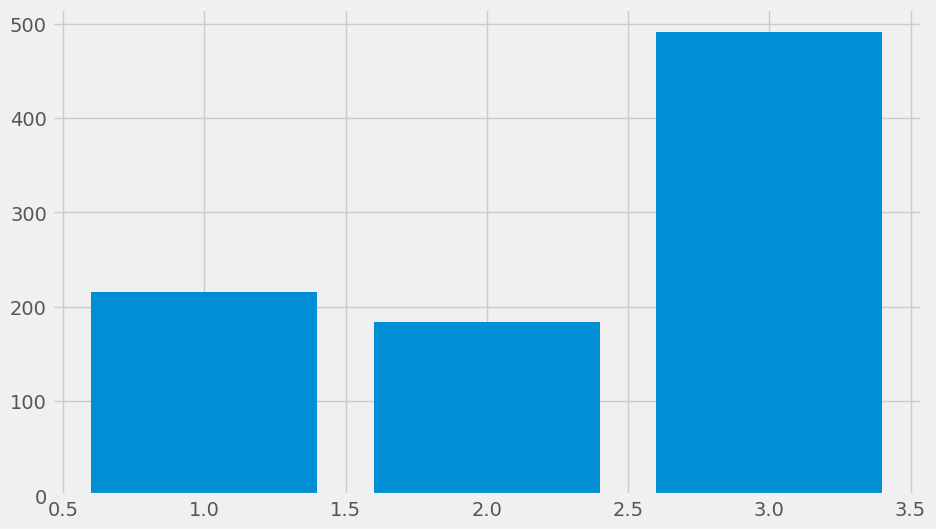

In [78]:
# 2. How can you create a bar plot showing the number of passengers in each passenger class (Pclass)?

titanic_pclass = titanic_df.groupby('Pclass')[['Pclass', 'Name']].size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
plt.bar(titanic_pclass['Pclass'], titanic_pclass['Count'])
plt.bar_label(titanic_pclass['Pclass'])

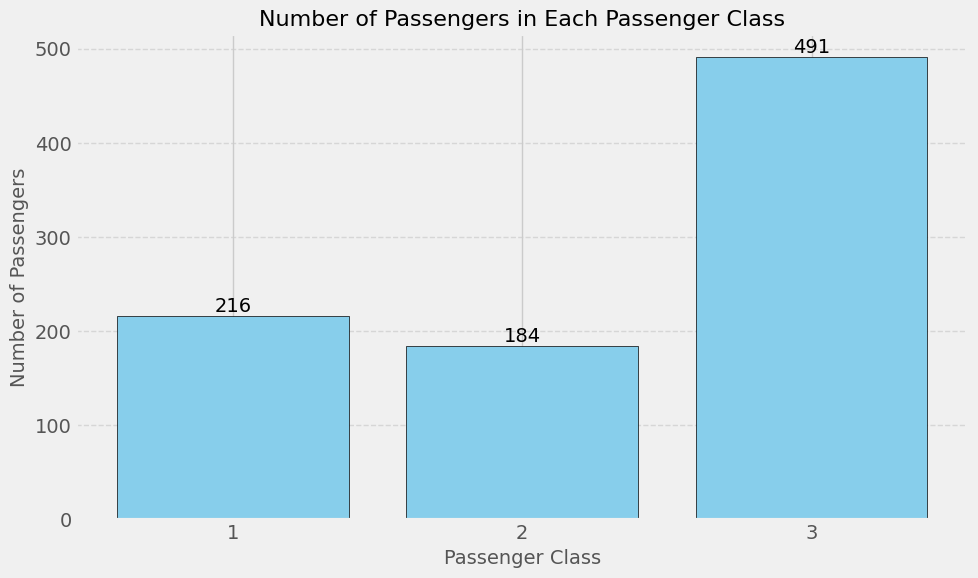

In [81]:
# 2. How can you create a bar plot showing the number of passengers in each passenger class (Pclass)?

titanic_pclass = titanic_df['Pclass'].value_counts().reset_index()
titanic_pclass.columns = ['Pclass', 'Count']  # Renaming columns for clarity

plt.figure(figsize=(10, 6))
bars = plt.bar(titanic_pclass['Pclass'], titanic_pclass['Count'], color='skyblue', edgecolor='black')

# Adding labels on top of the bars
plt.bar_label(bars)

# Adding title and labels
plt.title('Number of Passengers in Each Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)
plt.xticks(titanic_pclass['Pclass'])  # Ensure x-ticks match Pclass
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines for better readability

plt.tight_layout()  # Optimizes spacing in the figure
plt.show()
